# Multiple Linear Regression- Car dataset

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd

## Importing the dataset

In [2]:
dataset=pd.read_csv("CAR.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4337 entries, 0 to 4336
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4337 non-null   int64 
 1   selling_price  4337 non-null   int64 
 2   km_driven      4337 non-null   int64 
 3   fuel           4337 non-null   object
 4   seller_type    4337 non-null   object
 5   transmission   4337 non-null   object
 6   owner          4337 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.3+ KB


In [4]:
dataset['fuel'].value_counts()

Diesel      2151
Petrol      2122
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [5]:
dataset['seller_type'].value_counts()

Individual          3242
Dealer               993
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [6]:
dataset['transmission'].value_counts()

Manual       3889
Automatic     448
Name: transmission, dtype: int64

In [7]:
dataset['owner'].value_counts()

First Owner             2831
Second Owner            1104
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [8]:
#missing value?
dataset.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

### Split the dataset into independent (X's) and Dependent variables (Y)

In [9]:
x=dataset.drop('selling_price', axis=1)

In [10]:
x.sample()

,year,km_driven,fuel,seller_type,transmission,owner
762,2008,30000,Petrol,Individual,Manual,First Owner


In [11]:
y=dataset[['selling_price']]

In [12]:
y.sample()

,selling_price
486,500000


## Work with the catagorical data
- Label Encoding or Ordinal Encoding
- One-Hot Encoding 


### Label Encoding or Ordinal Encoding
This type of encoding is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels.
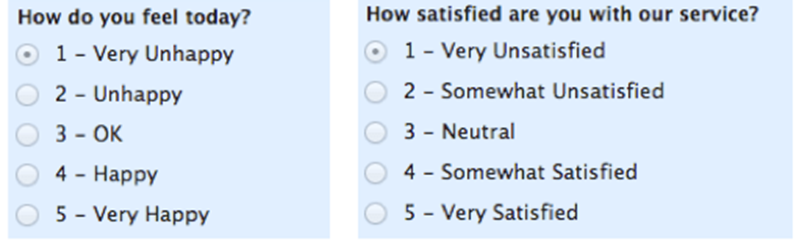
-  **from sklearn.preprocessing import LabelEncoder**
-  le = LabelEncoder()
-  x1 = le.fit_transform(x1)
-  print(x1)


### One-Hot Encoding 
- In One-Hot Encoding, each category of any categorical variable gets a new variable. 
- It maps each category with binary numbers (0 or 1). 
- This type of encoding is used when the data is nominal. 
- Newly created binary features can be considered dummy variables. 
- After one hot encoding, the number of dummy variables depends on the number of categories presented in the data. 
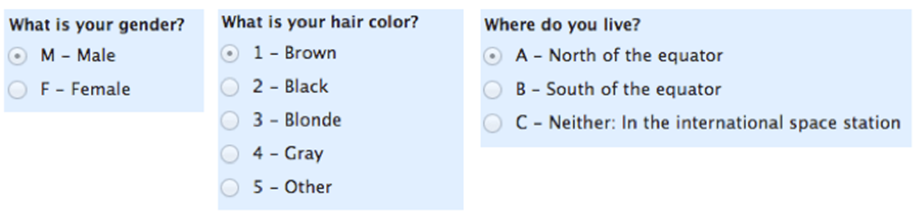
- `df1 = pd.get_dummies(df1[['x1', 'x2', 'x3', 'x4’]])`<------column name
- `print(df1)`

### Dummy Variable Trap -Multicollinearity
- The Dummy Variable Trap occurs when two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear). 
- This means that one variable can be predicted from the others, making it difficult to interpret predicted coefficient variables in regression models. 
- To avoid the dummy variable trap, the last dummy variable is dropped by setting `drop_first=True`
- `df1 = pd.get_dummies(df1[['x1', 'x2', 'x3', 'x4’]],drop_first=True )`<------column name
- print(df1)

In [13]:
x.sample()

,year,km_driven,fuel,seller_type,transmission,owner
3391,2012,170000,LPG,Individual,Manual,Third Owner


In [14]:
x=pd.get_dummies(x, drop_first=True)
x.head()

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0,0,0,1,1,0,1,0,0,0,0
1,2007,50000,0,0,0,1,1,0,1,0,0,0,0
2,2012,100000,1,0,0,0,1,0,1,0,0,0,0
3,2017,46000,0,0,0,1,1,0,1,0,0,0,0
4,2014,141000,1,0,0,0,1,0,1,0,1,0,0


### Fuel
- fuel_Disel: 1000
- fuel_Electric: 0100
- fuel_LPG: 0010
- fuel_Petrol: 0001
- fuel_Cng: 0000
### Seller type 
- seller_type_Individual: 10
- seller_type_Trustmark Dealer: 01
- Dealer: 00
### Transmission
- transmission_Manual: 1
- transmission_Automatic: 0
### Owner
- owner_Fourth & Above Owner: 1000
- owner_Second Owner: 0100
- owner_Test Drive Car: 0010
- owner_Third Owner: 0001
- owner_First Owner: 0000

## Splitting the dataset into the Training set and Test set
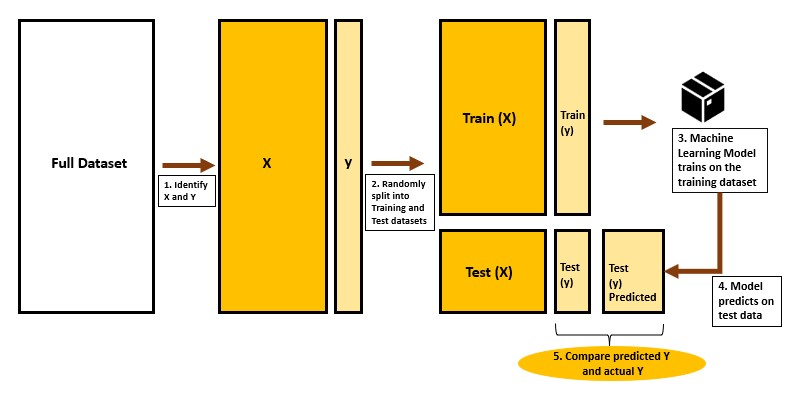-
It is very common to split the train:test datasets in:

- 70:30 ratio
- 80:20 ratio
- 75:25 ratio
- The `train_test_split()` method is used to split our data into train and test sets. 
-  The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model. 
-  The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. we can explicitly test the size of the train and test sets. 
-  It is suggested to keep our train sets larger than the test sets.
- test_size: int or float, by default None. If float, it should be between 0.0 and 1.0 and represent the percentage of the dataset to test split. If int is used, it refers to the total number of test samples. If the value is None, the complement of the train size is used. It will be set to 0.25 if train size is also None.
- train_size: int or float, by default None. 
- random_state : int,by default None. Controls how the data is shuffled before the split is implemented. For repeatable output across several function calls, pass an int.
 
- shuffle: boolean object , by default True. Whether or not the data should be shuffled before splitting. Stratify must be None if shuffle=False.


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,
                                                  test_size=.15,
                                                  random_state=20)

## Training the Multiple Linear Regression model on the Training set

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values, y_train)
# .fit for model training

LinearRegression()

## Intercept and Coefficient

In [17]:
print("Coefficients", regressor.coef_)

Coefficients [[ 3.63347147e+04 -8.77637576e-01  2.86565565e+05 -5.80689516e+05
   4.98349114e+04 -1.01394837e+03 -5.92325322e+04  1.66483770e+05
  -8.59995349e+05  5.42444609e+03 -3.92906663e+04  1.80911857e+05
  -3.04278236e+04]]


In [18]:
print("Intercept",regressor.intercept_)
#slope of the data

Intercept [-71903043.99752398]


In [19]:
x.head()

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,0,0,0,1,1,0,1,0,0,0,0
1,2007,50000,0,0,0,1,1,0,1,0,0,0,0
2,2012,100000,1,0,0,0,1,0,1,0,0,0,0
3,2017,46000,0,0,0,1,1,0,1,0,0,0,0
4,2014,141000,1,0,0,0,1,0,1,0,1,0,0


## Predicting the Test set results

In [20]:
y_pred=regressor.predict(X_test.values)

In [21]:
y_pred[:5]

array([[ 469100.85454085],
       [ 518310.64131486],
       [ 401169.90190437],
       [1376340.67702496],
       [ 146329.37075208]])

In [22]:
y_test.head()

,selling_price
406,215000
3027,349000
2277,300000
799,350000
2738,225000


### Calculate RMSE, R-Square

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import math
print("r2 score", r2_score(y_test,y_pred))
print("MSE", mean_squared_error(y_test,y_pred))
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred))}")

r2 score 0.525736936050869
MSE 146349984469.19287
RMSE: 382557.16496909695


## Validation case scenario:
#### 1. Predict how much will be the car selling price for a car of 
- year 2014 
- 70000 km driven 
- fuel type Diesel
- Seller type Dealer
- manual transmission
- first owner

** 465000 ** actual


In [24]:
x.sample()

,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
2695,2004,120000,0,0,0,1,1,0,1,0,0,0,0


In [25]:
regressor.predict([[2014, 70000, 1,0,0,0,0,0,1, 0,0,0,0]])

array([[640207.01551262]])

### Fuel
- fuel_Disel: 1000
- fuel_Electric: 0100
- fuel_LPG: 0010
- fuel_Petrol: 0001
- fuel_Cng: 0000
### Seller type 
- seller_type_Individual: 10
- seller_type_Trustmark Dealer: 01
- Dealer: 00
### Transmission
- transmission_Manual: 1
- transmission_Automatic: 0
### Owner
- owner_Fourth & Above Owner: 1000
- owner_Second Owner: 0100
- owner_Test Drive Car: 0010
- owner_Third Owner: 0001
- owner_First Owner: 0000

## Validation case scenario:
#### 1. Predict how much will be the car selling price for a car of 
- year 2015 
- 90000 km driven 
- fuel type Petrol
- Seller type Individual
- manual transmission
- first owner

In [26]:
regressor.predict([[2015,90000,0,0,0,1,1,0,1,0,0,0,0]])

array([[312176.93265353]])